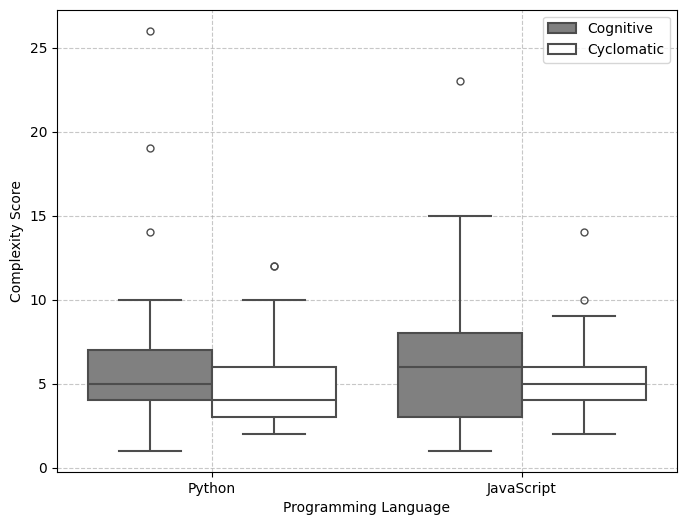

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "complexity_results.csv"

df = pd.read_csv(
    file_path,
    skiprows=2,  
    header=None, 
    names=[
        "Unused", 
        "Number", 
        "Question", 
        "Python_Cognitive", 
        "JavaScript_Cognitive",
        "Python_Cyclomatic", 
        "JavaScript_Cyclomatic"
    ]
)

df.drop(columns=["Unused"], inplace=True)

df_melted = df.melt(
    id_vars=["Number", "Question"], 
    value_vars=[
        "Python_Cognitive", 
        "JavaScript_Cognitive",
        "Python_Cyclomatic", 
        "JavaScript_Cyclomatic"
    ],
    var_name="Metric", 
    value_name="Complexity"
)

df_melted["Type"] = df_melted["Metric"].apply(
    lambda x: "Cognitive" if "Cognitive" in x else "Cyclomatic"
)

df_melted["Language"] = df_melted["Metric"].replace({
    "Python_Cognitive": "Python",
    "JavaScript_Cognitive": "JavaScript",
    "Python_Cyclomatic": "Python",
    "JavaScript_Cyclomatic": "JavaScript"
})

plt.figure(figsize=(8, 6))
sns.boxplot(
    x="Language",
    y="Complexity",
    hue="Type",
    data=df_melted,
    palette=["gray", "white"],
    linewidth=1.5,
    fliersize=5
)

plt.xlabel("Programming Language")
plt.ylabel("Complexity Score")
plt.legend(title="", loc="upper right", fontsize=10, frameon=True)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()